# Project: Investigating a Dataset (TMDb Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset that I have selected for analysis is The Movie Database (TMdb) dataset. The dataset consists of many variables such as genre, cast, director, production companies, runtime, poularity, rating, budget, etc. 
>
> The questions that I will explore are
> <ul>
>  1. How is popularity, runtime, budget, and revenue trending over time? <br>
>  2. Do top rated and high budget movies generate higher revenues? <br>
>  3. What are the top 10 movies based on popularity, ratings, budget, and revenue? <br>   
>  4. Which movie genres, cast, directors, production companies are most common? <br>
>  5. Can we provide a list of genres, cast, directors, production companies that are most popular? <br>


In [558]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> The first step is to load the data in the correct format and observe its general properties (dimension, data types, summary statistics, duplicated columns, missing values).

### General Properties


In [559]:
# Loading tmbd data 
df = pd.read_csv('tmdb-movies.csv')

# Printing first 5 rows ofo loaoded data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [560]:
# Checking dimension of data
df.shape

(10866, 21)

In [561]:
# Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [563]:
# checking summary statistics of continuous variables
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [564]:
# checking for duplicated rows
df.duplicated().sum()

1

In [565]:
# checking for missing values
df.isnull().sum() 

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> <li> The dataset consists of 10866 rows and 21 columns </li>
> <li> There are values of 0 in variables budget, budget_adj, revenue, revenue_adj, and runtime. </li>
> <li> There is 1 duplicated row. </li>
> <li> There are missing values in variables imdb_id, cast, homepage, director, tagline, keywords, overview, genres, prodouction_companies. </li>

### Data Cleaning (removing rows and changing data types)

> The steps I will take to clean the data are
> <ul>
> <li> Remove columns imdb_id, homepage, tagline, overview, release_data that will not be used for analysis </li>
> <li> Drop the duplicated row </li>
> <li> Replace 0 values in the budget, budget_adj, revenue, revenue_adj, and runtime with NAs </li>
> <li> Remove rows with NAs in variables budget, revenue, cast, director, runtime, genres, production_companies, budget_adj, revenue_adj </li>


In [566]:
# dropping columns
df.drop(['imdb_id', 'homepage', 'tagline', 'overview', 'release_date'], axis=1, inplace=True)

#checking output
df.head(5)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [567]:
# dropping duplicated rows
df.drop_duplicates(inplace=True)

# checking whether duplicated rows were dropped succesfully 
df.duplicated().sum()

0

In [568]:
# replacing 0s with NAs
df['budget'].replace(0, np.NAN, inplace = True)
df['revenue'].replace(0, np.NAN, inplace = True)
df['runtime'].replace(0, np.NAN, inplace = True)
df['budget_adj'].replace(0, np.NAN, inplace = True)
df['revenue_adj'].replace(0, np.NAN, inplace = True)

In [569]:
# checking NA values  
df.isnull().sum()

# dropping NA values
df.dropna(subset= ['budget', 'revenue','cast', 'director', 'runtime', 'genres', 'production_companies', 'budget_adj', 'revenue_adj'], inplace  = True)

In [570]:
# checking dimension of cleaned data
df.shape

(3805, 16)

<a id='eda'></a>
## Exploratory Data Analysis






### Question 1: How is popularity, runtime, budget, and revenue trending over time?


Text(0, 0.5, 'Runtime')

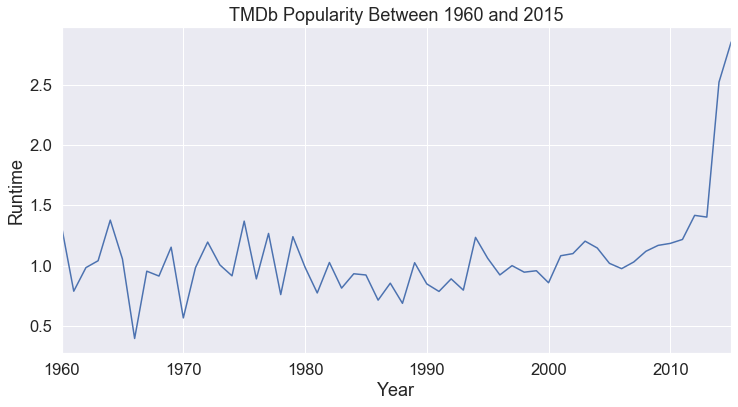

In [571]:
df.groupby('release_year')['popularity'].mean().plot(kind='line', figsize = (12, 6))
plt.title('TMDb Popularity Between 1960 and 2015')
plt.xlabel('Year')
plt.ylabel('Runtime')

> From 1960 to 2015, movie popularity stayed constant with minor fluctuations. From 2010 to 2015, movie popularity has increased exponentially from 1.18 to 2.86. 


Text(0, 0.5, 'Runtime')

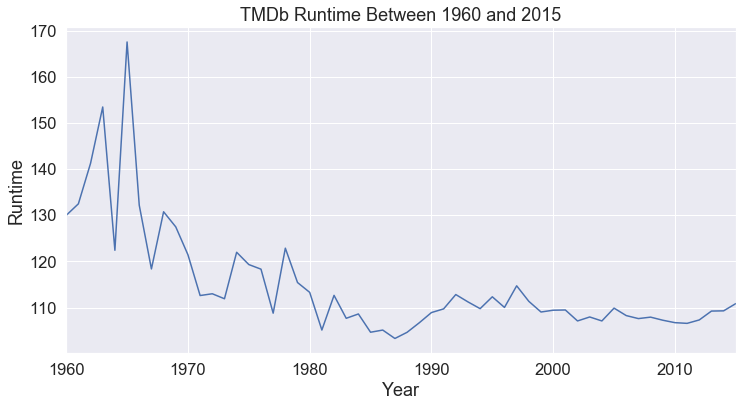

In [572]:
df.groupby('release_year')['runtime'].mean().plot(kind='line', figsize = (12, 6))
plt.title('TMDb Runtime Between 1960 and 2015')
plt.xlabel('Year')
plt.ylabel('Runtime')

> In general, movie runtime has decreased between 1960 and 2015. The average movie runtime reached its maximum at 1965 and decreasesd from 1965 to 1990. From 1990 to 2015, average movie runtime stayed constant at about 110 minutes.



Text(0, 0.5, 'Budget')

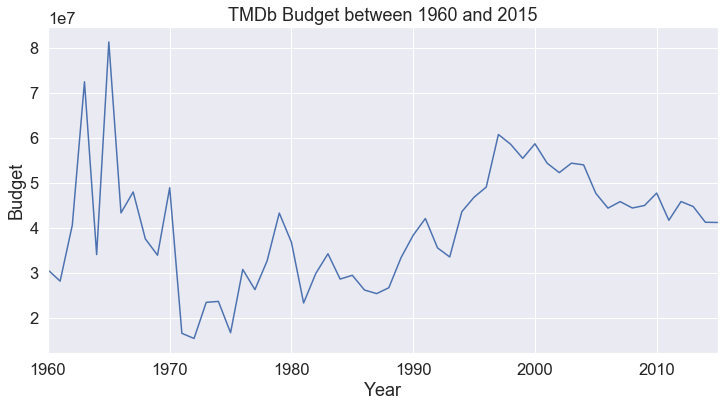

In [573]:
df.groupby('release_year')['budget_adj'].mean().plot(kind='line',  figsize = (12, 6))
plt.title('TMDb Budget between 1960 and 2015')
plt.xlabel('Year')
plt.ylabel('Budget')

> TMDb movie budget has fluctuated between 1960 and 2015. Movie budget increased from 1960 and reached its peak during the mid 1960s. After a sharp decrease, reaching its minimum during the early 1970s, movie budget increased with fluctuation until the late 1990s. From 1998 to 2015, movie budget slowly decreased.



Text(0, 0.5, 'Revenue')

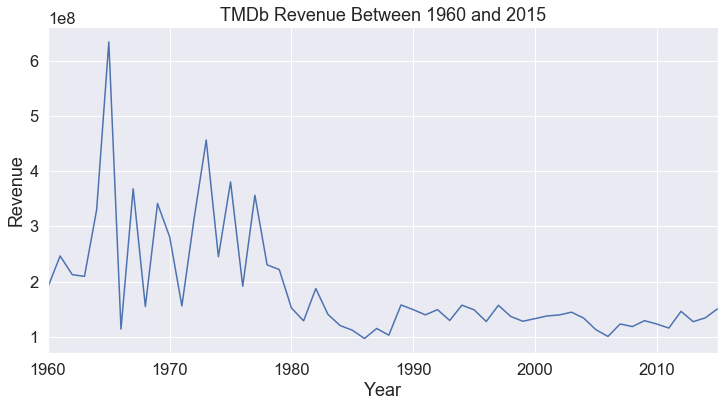

In [574]:
df.groupby('release_year')['revenue_adj'].mean().plot(kind='line', figsize = (12, 6))
plt.title('TMDb Revenue Between 1960 and 2015')
plt.xlabel('Year')
plt.ylabel('Revenue')

> Like TMDb budget, revenue fluctuated from 1960 to 2015. There is a great level of fluctuation in the beginning; however, from the mid 1980s revenue levels off at around 140 milion dollars. 

### Question 2 : Do top rated and high budget movies generate higher revenues?

In [575]:
#https://github.com/pooja2512/Investigate-a-Dataset/blob/master/Investigate_TMDb_Dataset.ipynb

# grouping by vote_average and obtaining mean values of all numeric variables
rating_group = df.groupby('vote_average').mean()

# setting vote_average as a column
rating_group['vote_average'] = rating_group.index.get_level_values(0)
rating_group.head()

,id,popularity,budget,revenue,runtime,vote_count,release_year,budget_adj,revenue_adj,vote_average
vote_average,,,,,,,,,,
2.2,116977.000000,0.111351,6.500000e+07,7.370600e+04,87.0,12.0,2012.000000,6.173338e+07,7.000185e+04,2.2
3.3,53053.666667,0.529250,2.353333e+07,1.100648e+07,99.0,66.0,2007.333333,2.637623e+07,1.240387e+07,3.3
3.4,10409.500000,0.496727,1.350000e+07,5.034187e+07,88.0,102.5,2005.000000,1.466542e+07,5.386660e+07,3.4
3.5,21694.000000,0.252779,1.600000e+07,7.682487e+06,93.0,43.0,2004.000000,1.827775e+07,8.747279e+06,3.5
3.6,10164.500000,0.231155,1.300000e+07,2.968139e+07,94.5,19.5,1992.000000,1.687817e+07,5.215843e+07,3.6


Text(0.5, 1, 'Rating Vs Revenue')

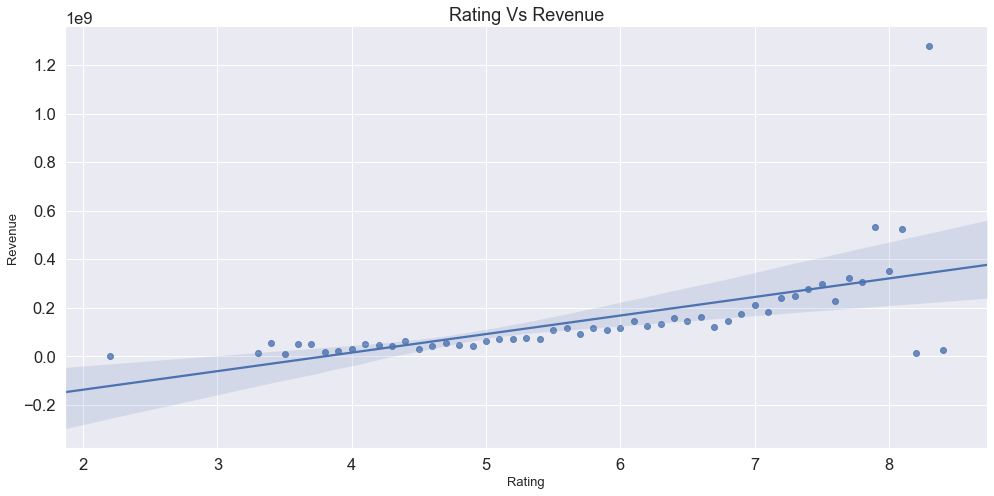

In [576]:
sns.lmplot(x = 'vote_average' , y = 'revenue_adj', data = rating_group, size=7, aspect=2)
plt.xlabel('Rating', fontsize = 13)
plt.ylabel('Revenue', fontsize = 13)
plt.title('Rating Vs Revenue', fontsize = 18)


> In general, higher rating movies generate higher revenues. Although there are some outliers when the rating is higher than 8. 


In [577]:
# grouping by vote_average and obtaining mean values of all numeric variables
budget_group = df.groupby('budget_adj').mean()

# setting vote_average as a column
budget_group['budget_adj'] = budget_group.index.get_level_values(0)
budget_group.head()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,revenue_adj,budget_adj
budget_adj,,,,,,,,,,
0.969398,59296.0,0.520430,1.0,1378.0,90.0,55.0,5.3,2011.0,1335.830503,0.969398
1.309053,39964.0,0.090186,1.0,100.0,95.0,14.0,4.8,1999.0,130.905285,1.309053
3.000000,39356.0,0.028456,3.0,43.0,87.0,26.0,7.3,2010.0,43.000000,3.000000
4.519285,14373.0,0.464188,2.0,16.0,88.0,27.0,5.6,1982.0,36.154278,4.519285
5.006696,20701.0,0.317091,3.0,16.0,93.0,37.0,5.8,1990.0,26.702377,5.006696


Text(0.5, 1, 'Budget Vs Revenue')

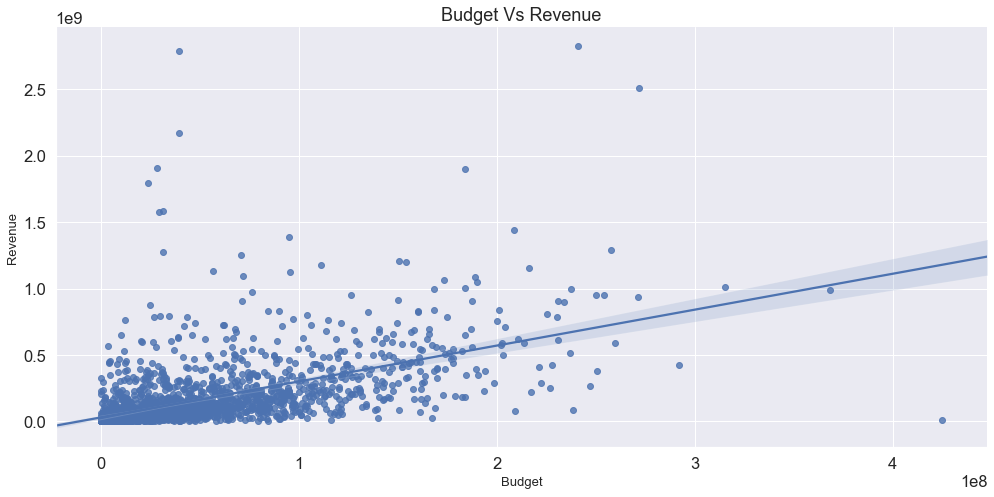

In [578]:
sns.lmplot(x = 'budget_adj' , y = 'revenue_adj', data = budget_group, size=7, aspect=2)
plt.xlabel('Budget', fontsize = 13)
plt.ylabel('Revenue', fontsize = 13)
plt.title('Budget Vs Revenue', fontsize = 18)


> There is a weak positive correlation betweeen budget and revenue. However, higher budget movies do not always generate higher revenue; some low budget movies generate the most revenue and some high budget movies generate very lov revenue.

### Question 3:  What are the top 10 movies based on popularity, ratings, budget, and revenue?


In [579]:
popularity_10 = df.sort_values(by = "popularity", ascending = False).loc[:,['original_title', 'popularity']][0:10]
popularity_10

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507
631,Captain America: The Winter Soldier,12.971027
1329,Star Wars,12.037933
632,John Wick,11.422751
3,Star Wars: The Force Awakens,11.173104
633,The Hunger Games: Mockingjay - Part 1,10.739009


Text(0.5, 1.0, 'Top 10 Most Popular Movies')

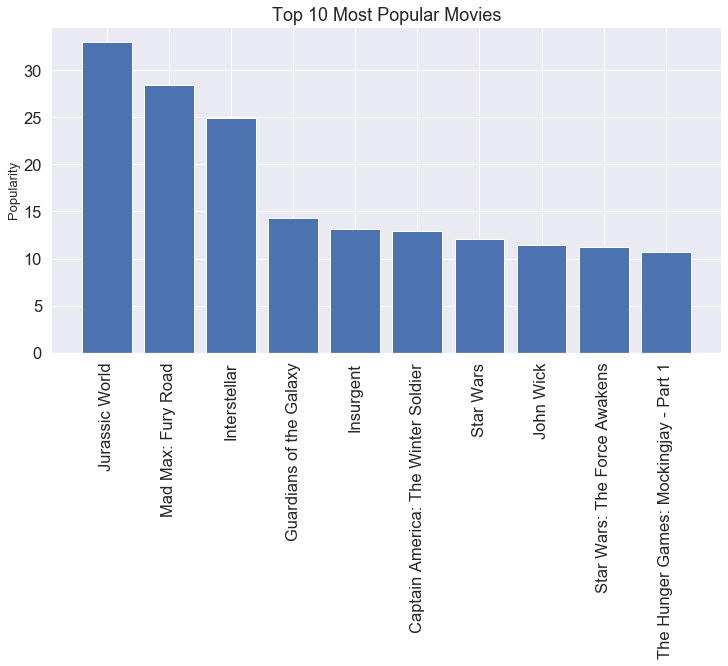

In [580]:
plt.figure(figsize=(12, 6))
plt.bar(popularity_10['original_title'], popularity_10['popularity'])
plt.xticks(rotation=90)
plt.ylabel('Popularity', fontdict = {'fontsize' : 13})
plt.title("Top 10 Most Popular Movies", fontdict = {'fontsize' : 18})

> The table and plot above shows the top 10 most popular movies from 1960 to 2015. Jurassic World is the most popular movie with a popularity score of 32.99. 



In [581]:
rating_10 = df.sort_values(by = "vote_average", ascending = False).loc[:,['original_title', 'vote_average']][0:10]
rating_10

,original_title,vote_average
4178,The Shawshank Redemption,8.4
7948,Stop Making Sense,8.4
7269,The Godfather,8.3
650,Whiplash,8.2
2875,The Dark Knight,8.1
2409,Fight Club,8.1
10222,Schindler's List,8.1
4177,Pulp Fiction,8.1
4179,Forrest Gump,8.1
9758,The Godfather: Part II,8.1


Text(0.5, 1.0, 'Top 10 Highest Rated Movies')

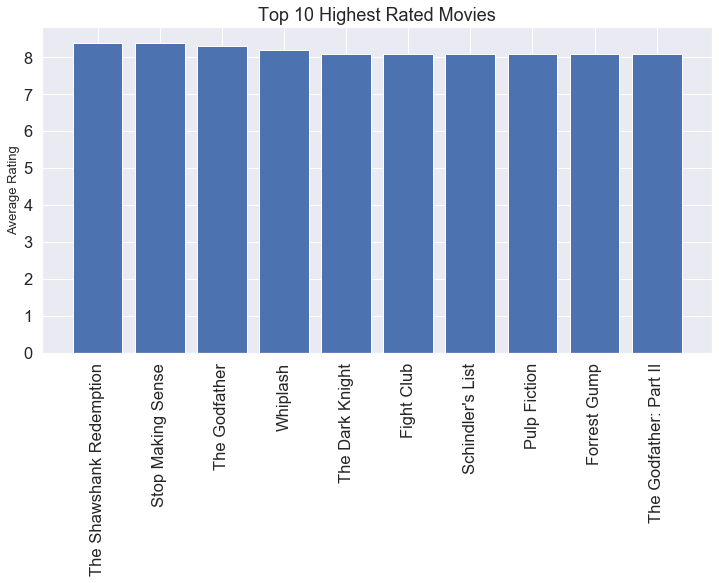

In [582]:
plt.figure(figsize=(12, 6))
plt.bar(rating_10['original_title'], rating_10['vote_average'])
plt.xticks(rotation=90)
plt.ylabel('Average Rating', fontdict = {'fontsize' : 13})
plt.title("Top 10 Highest Rated Movies", fontdict = {'fontsize' : 18})

> The table and plot above shows the top 10 movies with the highest rating from 1960 to 2015. The Shawshank Redemption and Stop Making Sense has the highest average rating. 


In [583]:
budget_10 = df.sort_values(by = "budget_adj", ascending = False).loc[:,['original_title', 'budget_adj']][0:10]
budget_10

,original_title,budget_adj
2244,The Warrior's Way,4.250000e+08
3375,Pirates of the Caribbean: On Stranger Tides,3.683713e+08
7387,Pirates of the Caribbean: At World's End,3.155006e+08
6570,Superman Returns,2.920507e+08
5231,Titanic,2.716921e+08
7394,Spider-Man 3,2.713305e+08
1929,Tangled,2.600000e+08
14,Avengers: Age of Ultron,2.575999e+08
1389,Harry Potter and the Half-Blood Prince,2.541001e+08
8089,Waterworld,2.504192e+08


Text(0.5, 1.0, 'Top 10 Highest Budget Movies')

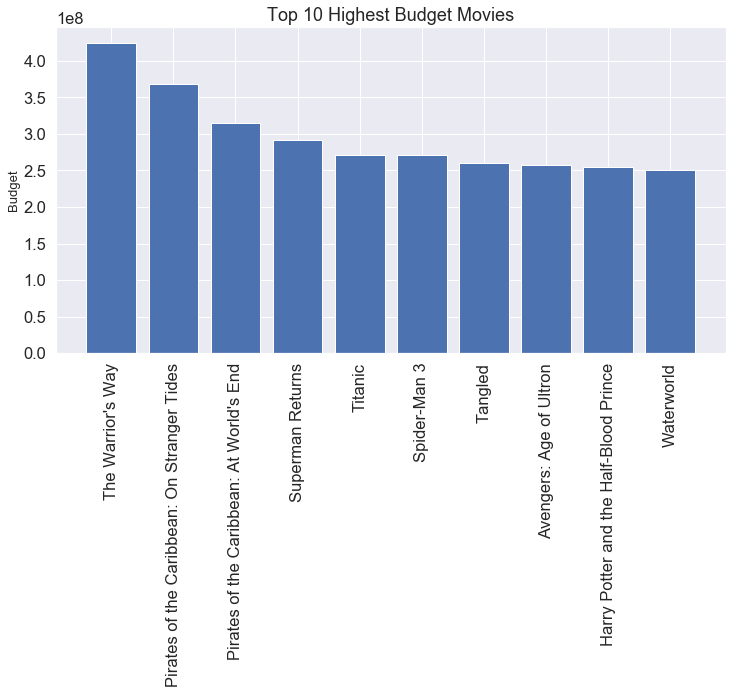

In [584]:
plt.figure(figsize=(12, 6))
plt.bar(budget_10['original_title'], budget_10['budget_adj'])
plt.xticks(rotation=90)
plt.ylabel('Budget', fontdict = {'fontsize' : 13})
plt.title("Top 10 Highest Budget Movies", fontdict = {'fontsize' : 18})

> The table and plot above shows the top 10 movies with the highest budget from 1960 to 2015. The Warrior's Way has the highest budget (425 milion dollars).



In [585]:
revenue_10 = df.sort_values(by = "revenue_adj", ascending = False).loc[:,['original_title', 'revenue_adj']][0:10]
revenue_10

,original_title,revenue_adj
1386,Avatar,2.827124e+09
1329,Star Wars,2.789712e+09
5231,Titanic,2.506406e+09
10594,The Exorcist,2.167325e+09
9806,Jaws,1.907006e+09
3,Star Wars: The Force Awakens,1.902723e+09
8889,E.T. the Extra-Terrestrial,1.791694e+09
8094,The Net,1.583050e+09
10110,One Hundred and One Dalmatians,1.574815e+09
4361,The Avengers,1.443191e+09


Text(0.5, 1.0, 'Top 10 Highest Revenue Movies')

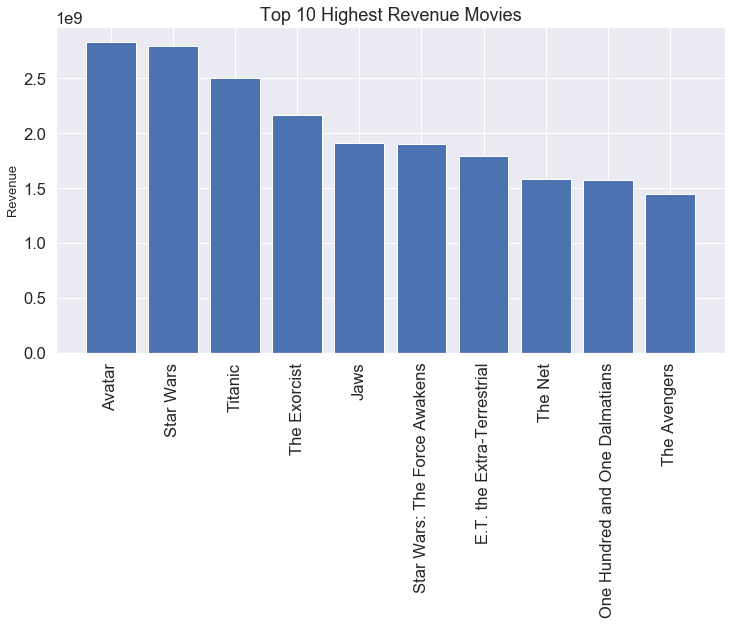

In [586]:
plt.figure(figsize=(12, 6))
plt.bar(revenue_10['original_title'], revenue_10['revenue_adj'])
plt.xticks(rotation=90)
plt.ylabel('Revenue', fontdict = {'fontsize' : 13})
plt.title("Top 10 Highest Revenue Movies", fontdict = {'fontsize' : 18})

> The table and plot above shows the top 10 movies with the highest revenue from 1960 to 2015. Avatar has the highest revenue (2.83 bilion dollars).

### Question 4: Which movie genres, cast, directors, production companies are most common?


In [587]:
# https://medium.com/@sureshssarda/pandas-splitting-exploding-a-column-into-multiple-rows-b1b1d59ea12e

# create new dataframe with id as index
genre = pd.DataFrame(df.genres.str.split('|').tolist(),index=df.id).stack()
# make id as a column
genre = genre.reset_index([0, 'id'])
# set column names
genre.columns = ['id', 'Genre']

#check dataframe output
genre.head()

,id,Genre
0,135397,Action
1,135397,Adventure
2,135397,Science Fiction
3,135397,Thriller
4,76341,Action


In [588]:
# merge genre dataframe with original dataframe to create a stacked dataframe
merged_genre = pd.merge(df, genre, on='id', how='left')
merged_genre.drop(['genres'], axis=1, inplace=True)

# check datatframe output
merged_genre.head(10)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,Genre
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
2,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
3,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
4,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
5,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Adventure
6,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Science Fiction
7,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Thriller
8,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
9,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,Science Fiction


Text(0.5, 1.0, 'Most Frequent Movie Genres')

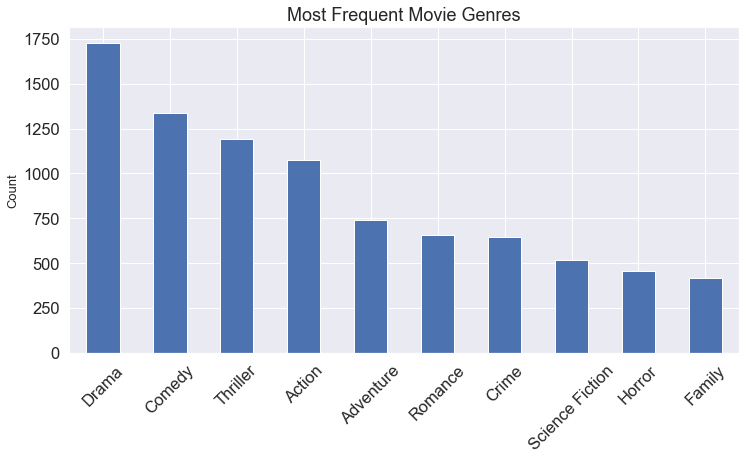

In [589]:
genre_10 = merged_genre['Genre'].value_counts()[:10]
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plt.figure(figsize=(12, 6))
genre_10.plot(kind = 'bar')
plt.ylabel('Count', fontsize = 13)
plt.xticks(rotation=45)

plt.title("Most Frequent Movie Genres", fontdict = {'fontsize' : 18})

> The most frequent movie genres are drama, comedy, thriller, action, adventure, romance, crime, science fiction, horror, and family. 

In [590]:
# create new dataframe with id as index
cast = pd.DataFrame(df.cast.str.split('|').tolist(),index=df.id).stack()
# make id as a column
cast = cast.reset_index([0, 'id'])
# set column names
cast.columns = ['id', 'Cast']

#check dataframe output
cast.head()

,id,Cast
0,135397,Chris Pratt
1,135397,Bryce Dallas Howard
2,135397,Irrfan Khan
3,135397,Vincent D'Onofrio
4,135397,Nick Robinson


In [591]:
# merge cast dataframe with original dataframe to create a stacked dataframe
merged_cast = pd.merge(df, cast, on='id', how='left')
merged_cast.drop(['cast'], axis=1, inplace=True)

# check datatframe output
merged_cast.head(10)

,id,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,Cast
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt
1,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Bryce Dallas Howard
2,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Irrfan Khan
3,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Vincent D'Onofrio
4,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Nick Robinson
5,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy
6,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Charlize Theron
7,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Hugh Keays-Byrne
8,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Nicholas Hoult
9,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,Josh Helman


Text(0.5, 1.0, 'Most Frequent Movie Cast')

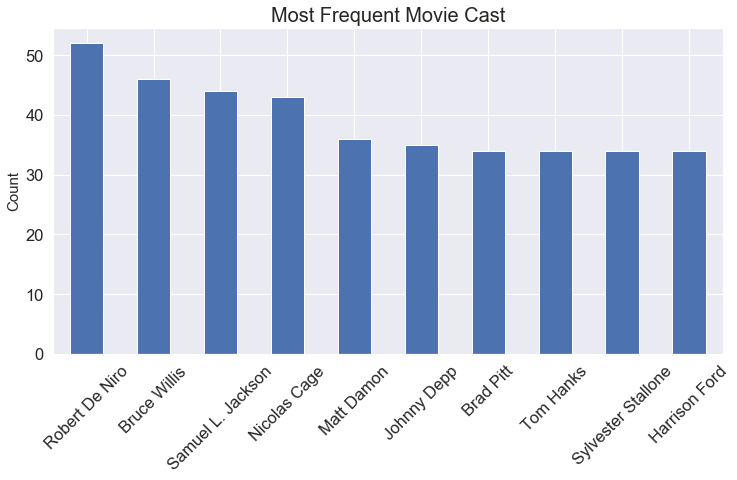

In [592]:
cast_10 = merged_cast['Cast'].value_counts()[:10]
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plt.figure(figsize=(12, 6))
cast_10.plot(kind = 'bar')
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation=45)

plt.title("Most Frequent Movie Cast", fontdict = {'fontsize' : 20})

> The most frequent movie cast are Robert De Niro, Bruce Willis, Samuel L. Jackson, Nicolas Cage, Matt Damon, Johnny Depp, Brad Pitt, TomHanks, Sylvester Stallon, and Harrison Ford.

In [593]:
# create new dataframe with id as index
director = pd.DataFrame(df.director.str.split('|').tolist(),index=df.id).stack()
# make id as a column
director = director.reset_index([0, 'id'])
# set column names
director.columns = ['id', 'Director']

#check dataframe output
director.head()

,id,Director
0,135397,Colin Trevorrow
1,76341,George Miller
2,262500,Robert Schwentke
3,140607,J.J. Abrams
4,168259,James Wan


In [594]:
# merge director dataframe with original dataframe to create a stacked dataframe
merged_director = pd.merge(df, director, on='id', how='left')
merged_director.drop(['director'], axis=1, inplace=True)

# check datatframe output
merged_director.head(10)

,id,popularity,budget,revenue,original_title,cast,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,Director
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,Colin Trevorrow
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,George Miller
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,Robert Schwentke
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,J.J. Abrams
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,James Wan
5,281957,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,father-son relationship|rape|based on novel|mo...,156.0,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,3929,7.2,2015,1.241999e+08,4.903142e+08,Alejandro GonzÃ¡lez IÃ±Ã¡rritu
6,87101,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,saving the world|artificial intelligence|cybor...,125.0,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2598,5.8,2015,1.425999e+08,4.053551e+08,Alan Taylor
7,286217,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,based on novel|mars|nasa|isolation|botanist,141.0,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,4572,7.6,2015,9.935996e+07,5.477497e+08,Ridley Scott
8,211672,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,assistant|aftercreditsstinger|duringcreditssti...,91.0,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2893,6.5,2015,6.807997e+07,1.064192e+09,Kyle Balda
9,211672,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,assistant|aftercreditsstinger|duringcreditssti...,91.0,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2893,6.5,2015,6.807997e+07,1.064192e+09,Pierre Coffin


Text(0.5, 1.0, 'Most Frequenct Movie Directors')

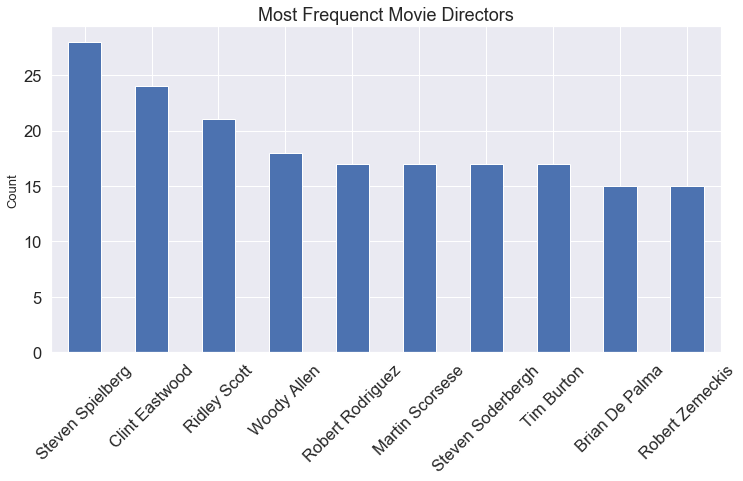

In [595]:
director_10 = merged_director['Director'].value_counts()[:10]
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plt.figure(figsize=(12, 6))
director_10.plot(kind = 'bar')
plt.ylabel('Count', fontsize = 13)
plt.xticks(rotation=45)

plt.title("Most Frequenct Movie Directors", fontdict = {'fontsize' : 18})

> The most frequent movie directors are Steven Spielberg, Clint Eastwood, Ridley Scott, Woody Allen, Robert Rodriguez, Martin Scorsese, Steven Soderbergh, Tim Burton, Brian De Palma, and Robert Zemeckis.

In [596]:
# create new dataframe with id as index
production_companies = pd.DataFrame(df.production_companies.str.split('|').tolist(),index=df.id).stack()
# make id as a column
production_companies = production_companies.reset_index([0, 'id'])
# set column names
production_companies.columns = ['id', 'Production_companies']

#check dataframe output
production_companies.head()

,id,Production_companies
0,135397,Universal Studios
1,135397,Amblin Entertainment
2,135397,Legendary Pictures
3,135397,Fuji Television Network
4,135397,Dentsu


In [597]:
# merge cast dataframe with original dataframe to create a stacked dataframe
merged_production_companies = pd.merge(df, production_companies, on='id', how='left')
merged_production_companies.drop(['production_companies'], axis=1, inplace=True)

# check datatframe output
merged_production_companies.head(10)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,Production_companies
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,Universal Studios
1,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,Amblin Entertainment
2,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,Legendary Pictures
3,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,Fuji Television Network
4,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,Dentsu
5,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,Village Roadshow Pictures
6,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,Kennedy Miller Productions
7,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,Summit Entertainment
8,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,Mandeville Films
9,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,Red Wagon Entertainment


Text(0.5, 1.0, 'Most Frequenct Production Companies')

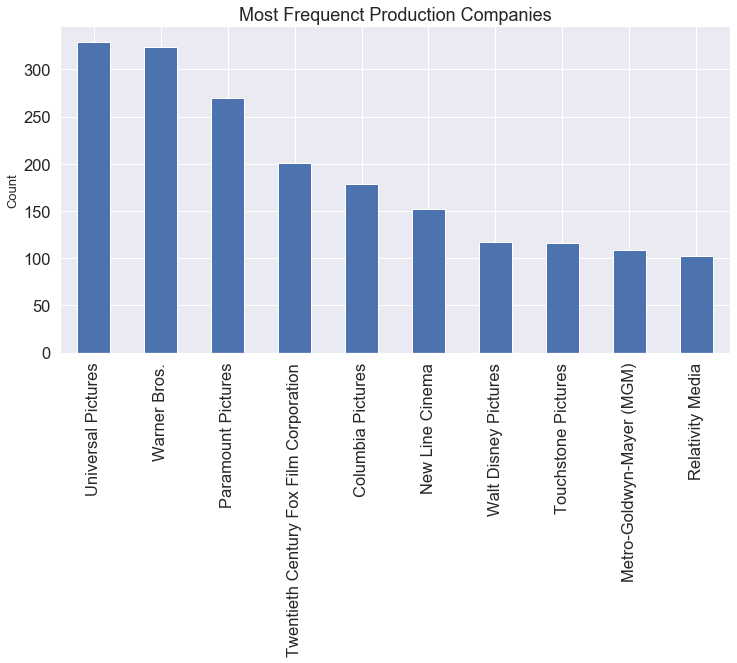

In [598]:
production_companies_10 = merged_production_companies['Production_companies'].value_counts()[:10]
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plt.figure(figsize=(12, 6))
production_companies_10.plot(kind = 'bar')
plt.ylabel('Count', fontsize = 13)
plt.xticks(rotation=90)

plt.title("Most Frequenct Production Companies", fontdict = {'fontsize' : 18})

> The most frequent movie production companies are Universal Pictures, Warner Bros., Paramount Pictures, Twentieth Century Fox Film Corporation, Columbia Pictures, New Line Cinema, Walt Disney Pictures, Touchstone Pictures, Metro-Goldwyn-Mayer(MGM), and Relativity Media. 


### Question 5: Can we provide a list of genres, cast, directors, production companies that are most popular?

Text(0.5, 1.0, 'Most Popular Movie Genres')

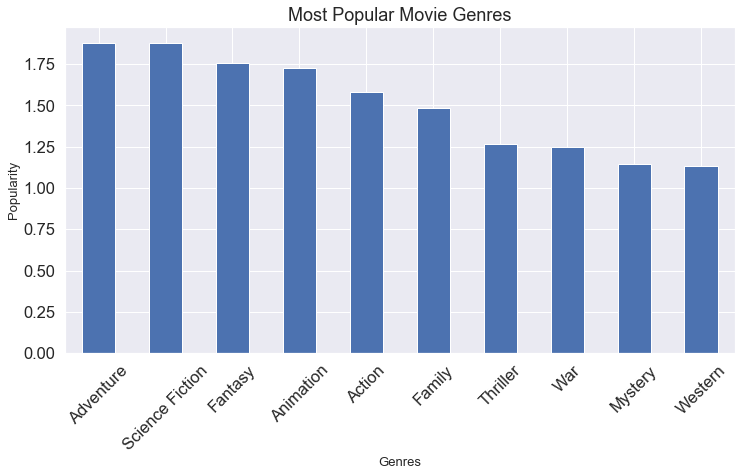

In [599]:
merged_genre.groupby('Genre')['popularity'].mean().nlargest(10).plot(kind='bar', figsize = (12, 6))
plt.xlabel('Genres', fontdict = {'fontsize' : 13})
plt.ylabel('Popularity', fontdict = {'fontsize' : 13})
plt.xticks(rotation=45)
plt.title('Most Popular Movie Genres', fontdict = {'fontsize' : 18})

> The most popular movie genres are adventure, science fiction, fantasy, animation, action, family, thriller, war, mystery, and Western. 

Text(0.5, 1.0, 'Most Popular Movie Cast')

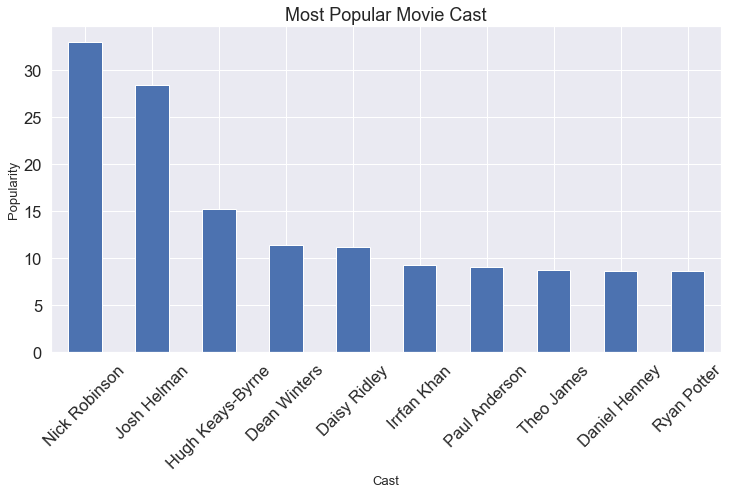

In [600]:
merged_cast.groupby('Cast')['popularity'].mean().nlargest(10).plot(kind='bar', figsize = (12, 6))
plt.xlabel('Cast', fontdict = {'fontsize' : 13})
plt.ylabel('Popularity', fontdict = {'fontsize' : 13})
plt.xticks(rotation=45)
plt.title('Most Popular Movie Cast', fontdict = {'fontsize' : 18})

> The most popular movie cast are Nick Robinson, Josh Helman, Hugh Keays-Bryne, Dean Winters, Daisy Ridley, Irrfan Khan, Paul Anderson, Theo James, Daniel Henney, and Ryan Potter.

Text(0.5, 1.0, 'Most Popular Movie Directors')

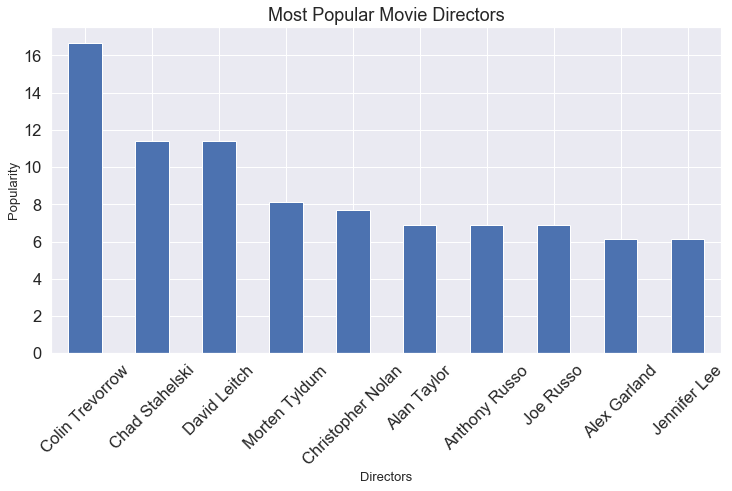

In [601]:
merged_director.groupby('Director')['popularity'].mean().nlargest(10).plot(kind='bar', figsize = (12, 6))
plt.xlabel('Directors', fontdict = {'fontsize' : 13})
plt.ylabel('Popularity', fontdict = {'fontsize' : 13})
plt.xticks(rotation=45)
plt.title('Most Popular Movie Directors', fontdict = {'fontsize' : 18})

> The most popular movie directors are Colin Trevorrow, Chad Stahelski, David Leitch, Morten Tyldum, Christopher Nolan, Alan Taylor, Anthony Russo, Joe Russo, Alex Garland, and Jennifer Lee. 

Text(0.5, 1.0, 'Most Popular Movie Production Companies')

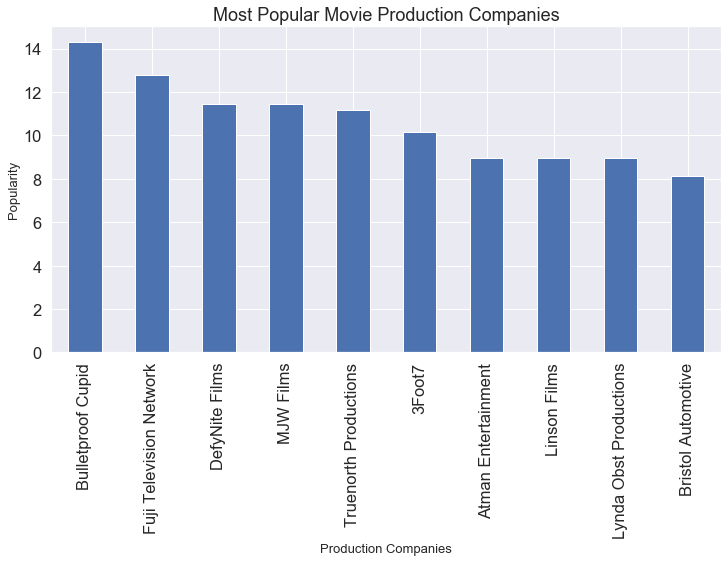

In [602]:
merged_production_companies.groupby('Production_companies')['popularity'].mean().nlargest(10).plot(kind='bar', figsize = (12, 6))
plt.xlabel('Production Companies', fontdict = {'fontsize' : 13})
plt.ylabel('Popularity', fontdict = {'fontsize' : 13})
plt.xticks(rotation=90)
plt.title('Most Popular Movie Production Companies', fontdict = {'fontsize' : 18})

> The most popular movie production companies are Bullteproof Cupid, Fuji Television Network. Defynite Films, MJW Films, Truenorth Productions, 3Foot7, Attman Entertainment, Linson Films, Lynda Obst Productions, and Bristol Automotive.

<a id='conclusions'></a>
## Conclusions

> Some major findings and results from the analyses performed above are
> <ul> 
> <li> From 1960 to 2015, the average TMDb movie popularity has increased, runtime has decreased, budget has increased and then decreased, and revenue has remained roughly constant. </li>
> <li> Top rated movies generally generate higher revenue, but high budget movies do not generate higher revenue.  </li>
> <li> The most popular TMDb movie is Jurassic World, the highest rated movie is The Shawshank Redemption, the highest budget movie is The Warrior's Way, and the highest revenue movie is Avatar</li>
> <li> The most produced movie genre is drama, cast is Robert De Niro, director is Steven Spielberg, and production company is Universal Pictures.  </li>
> <li> The most popular genre is adventure, cast is Nick Robinson, director is Colin Trevorrow, and production company is Bulletproof Cupid. </li>
>
>
>### Limitations
> <ul> 
> <li> A number of movies had to be removed from the dataset because they either had missing or incorrect values for some variables. </li>
> <li> No statistical test has been conducted so the results do not indicate any causation; the analyses are observations and trends in TMDb movies between 1960 and 2015. </li>
